# 1. Python을 이용한 기술통계 - 타이타닉 탐색적 분석

# 1) 분석목표 : 생존률에 영향을 미치는 영향인자 도출

# 2) 변수설명
1. Pclass : 승객 등급. 1,2,3등석.
2. Name, Sex, Age : 차례대로 이름, 성별, 나이 
3. SibSp : 함께 탑승한 형제, 배우자의 수.
4. Parch : 함께 탑승한 자녀, 부모의 수.
5. Ticket : 티켓 아이디
6. Fare : 티켓 요금(파운드)
7. Cabin : 객실 번호
8. Embarked : 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

In [146]:
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #Scaling 클래스

plt.rcParams['font.family'] = 'NanumGothicCoding' #한글폰트 설정

# 데이터 속성 및 기술통계량 확인

In [147]:
#titanic 데이터셋의 주요 통계치와 데이터 정보 출력
df = pd.read_csv("/home/piai/다운로드/실습화일/1 Big Data 분석 기초/titanic.csv", encoding = 'euc-kr')
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [148]:
df.describe() #각 열에 대한 주요 통계치를 요약하여 출력

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 위 통계치 중 아래 세 개는 다음과 같은 의미를 담고있다.
> 1. count(개수) : 해당 열에 결측치를 제외한 실제 데이터의 개수
> 2. mean(평균) : 해당 열의 평균값
> 3. std(Standard Deviation 표준편차) : 해당 열의 값들이 평균에서 얼마나 퍼져있는가?

즉, 위 결괏값에서 생존율은 38%라는 점을 알 수 있다. (mean의 Survived = 0.383838)

In [149]:
df.info() #데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 변수들의 결측 및 이상치 처리

이제 데이터의 결측치를 확인해보자.

In [150]:
df.isnull().sum() #데이터 결측값

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

위 결괏값에서 Cabin의 결측치가 많이 나온다는 것을 알 수 있다.
(*결측값 : 데이터가 존재하지 않거나 수집하지 못한 경우에 자주 발생)

처음에는 객실 번호(Cabin)에 따라 더욱 안전한 객실이 있을 것으로 생각했지만(위치를 기반으로) 결측값이 많이 나와 삭제하기로 결정했다.<br>
또한 이름(Name), 티켓 아이디(Ticket), 티켓 요금(Fare)도 생존과 관계가 없다고 판단하여 삭제하기로 결정했다.<br>
(객실 등급이 1등급일 수록, 티켓 요금도 비싸질거라 판단하에 티켓 요금을 지우고 객실 등급 데이터를 남겨뒀다.)

In [151]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'Fare'], axis = 1)

아래와 같이 isnull().sum()을 사용해서 확인해보니 'Cabin', 'Name', 'Ticket', 'Fare' 데이터 값이 사라진 것을 확인할 수 있다.

In [105]:
df.isnull().sum() #데이터 결측값

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [155]:
df2 = df['Embarked'].value_counts().sort_index() #Embarked에서 S의 값이 가장 많음

C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [161]:
df['Embarked'].fillna('S', inplace = True) #df의 Embarked열에서 결측값을 S로 대체

In [163]:
df.isnull().sum() #데이터 결측값 재확인 (모두 0이 된 것을 확인할 수 있음)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

<Axes: >

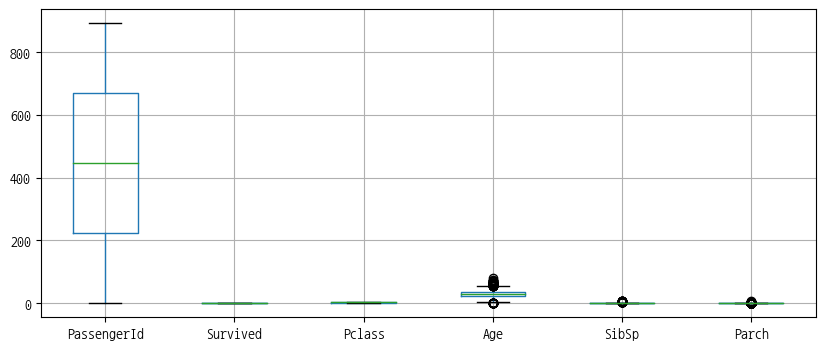

In [166]:
df.boxplot(figsize = (10, 4)) #이상치 확인을 위해 boxplot을 그렸으나, 이상치는 없단 것으로 판단

# 그래프 분석을 통해 변수간 관계를 확인

1. Pclass와 survived의 관계를 살펴보자.

In [164]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass와 Survived열을 선택하고, Pclass를 기준으로 그룹화 한 후 Survived의 평균값을 계산하여 내림차순으로 정렬하였다.<br>
즉, 각각의 Pclass별 생존률을 계산하여 생존율이 높은 순서로 출력한다.<br>
여기서는 객실 등급이 좋을수록(사회/경제적 지위가 높을수록) 생존율이 높다는 사실을 알 수 있다.<br>
<br>
위 결과를 토대로 간단한 도메인 지식을 검색해보니 3등실은 여러 구역이 철창으로 막혀 제한되어 있었고 배가 미로처럼 복잡했기 때문에 탈출에 지장이 있었으며, <br>3등실 승객들 중에는 영어를 잘 하지 못하는 승객들도 많았다고 한다.

또한 이 결과를 통해 1등급의 위치가 탈출하기 좋은 위치였을 거라고 생각이 든다.

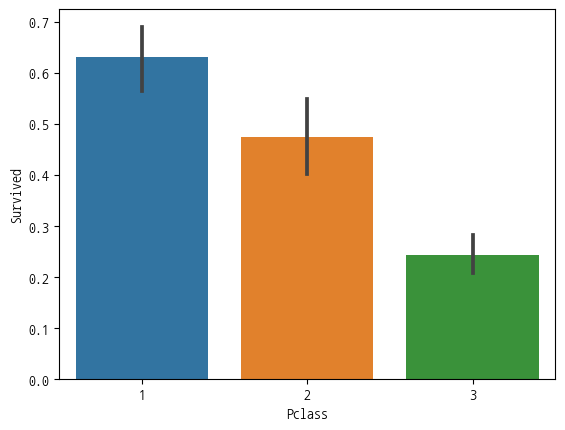

In [165]:
chart = sns.barplot(x = 'Pclass', y = 'Survived', data = df) #barplot()함수를 이용해 막대 그래프 그리기 (시각화)

2. Sex와 survived의 관계를 살펴보자.

In [108]:
df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


위 결괏값에서 여성(female)의 경우 생존률이 평균 0.74로, 남성의 경우 생존률이 0.19로 나타났다.<br>
즉, 이를 통해 여성이 남성보다 생존 확률이 높다는 것을 알 수 있다.
<br>
위 결과를 토대로 간단한 도메인 지식을 검색해보니 이 사건이 일어난 1912년 시대적 배경에는 “Lady First”라는 개념이 존재했다고 한다.<br>
따라서 어린이와 여자부터 우선적으로 구조 했기에 여자의 생존률이 더 높다고 생각된다.

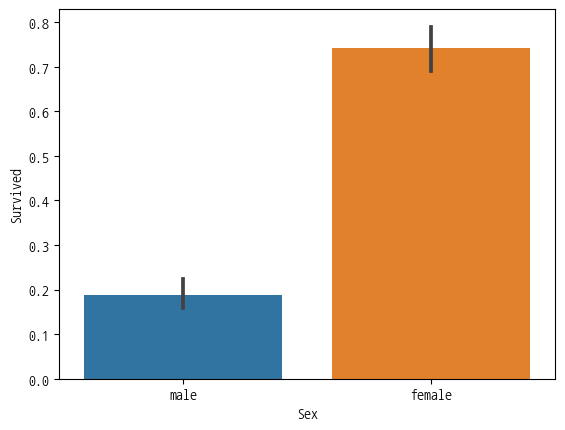

In [109]:
sns.barplot(x = 'Sex', y = 'Survived', data = df) #barplot()함수를 이용해 막대 그래프 그리기 (시각화)
plt.show()

3. Parch와 survived의 관계를 살펴보자.

In [174]:
df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


위 결괏값에서 부모, 자녀와 함께 탑승한 인원 수에 따른 생존률의 차이는 크지 않다는 것을 알 수 있다.

4. SibSp와 survived의 관계를 살펴보자.

In [175]:
df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


위 결괏값에서 형제, 자매와 함께 배에 탑승한 경우가 혼자 탑승한 경우보다 생존 확률이 높다는 것을 알 수 있다.<br>
하지만 형제, 자매나 배우자가 세 명 이상인 경우에는 생존 확률이 훨씬 낮아지는 것을 확인할 수 있다.<br>
즉, 형제, 자매 또는 배우자와 함께 탑승한 인원 수에 따른 생존률의 차이는 크지 않다.<br>

형제, 자매 또는 배우자와 함께 탑승한 인원이 없는 경우 생존률은 0.35이고<br>
형제, 자매 또는 배우자와 함께 탑승한 인원이 한 명인 경우 생존률은 0.54이다.

5. Embarked와 survived의 관계를 살펴보자.

In [176]:
df[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


타이타닉호는 S(Southampton)에서 출발해서 C(Cherbourg), Q(Queenstown)를 차례대로 거쳐서 출발한지 5일째에 빙산과 충돌했다고 한다.</br>
위 결괏값에서 Cherbourg에서 탄 사람 중에서는 생존한 사람의 비율이 높고, </br>나머지 두 선착장에서 탄 사람들은 생존한 사람보다 그렇지 못한 사람이 조금 더 많은것을 알 수 있다.</br>
위 결과를 토대로 간단한 도메인 지식을 검색해보니 Southampton에서 선착한 사람이 가장 많았다고 한다. </br>
</br>
아마 S(Southampton)에서 탑승한 사람이 조금 더 피로감을 느꼈을 거라 생각해 S, C, Q 셋 중 Survived 값이 가장 낮다고 생각이 든다.

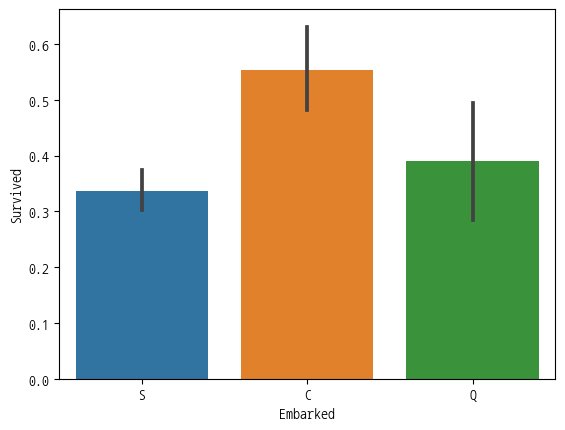

In [119]:
sns.barplot(x = 'Embarked', y = 'Survived', data = df) #barplot()함수를 이용해 막대 그래프 그리기 (시각화)
plt.show()

6. Age별 Survived에 대한 히스토그램을 그려보자.

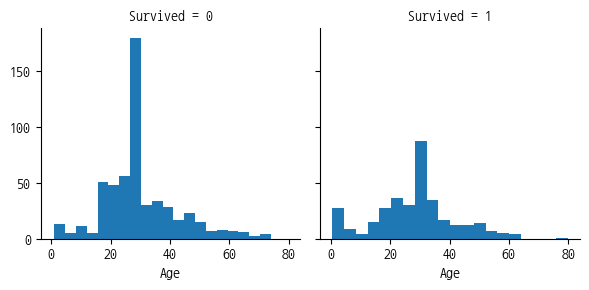

In [160]:
df_age = sns.FacetGrid(df, col = 'Survived') #Survived 열을 기준으로 FacetGrid를 만든다.
df_age.map(plt.hist, 'Age', bins = 20) #히스토그램 구간(bin) 갯수 설정
plt.show()

FacetGrid는 데이터를 그룹화하여 서로 다른 서브플롯에 시각화할 수 있는 그리드 형태의 객체이다. </br>
위 결괏값을 통해, 생존(Survived = 1)과 비생존(Survived = 0) 그룹의 나이 분포를 비교할 수 있다. </br>
막대의 높이가 높을수록 해당 나이 구간에 속하는 승객이 많다는 의미이다.

7. Pclass에 따른 Age별 Survived에 대한 히스토그램을 그려보자. 

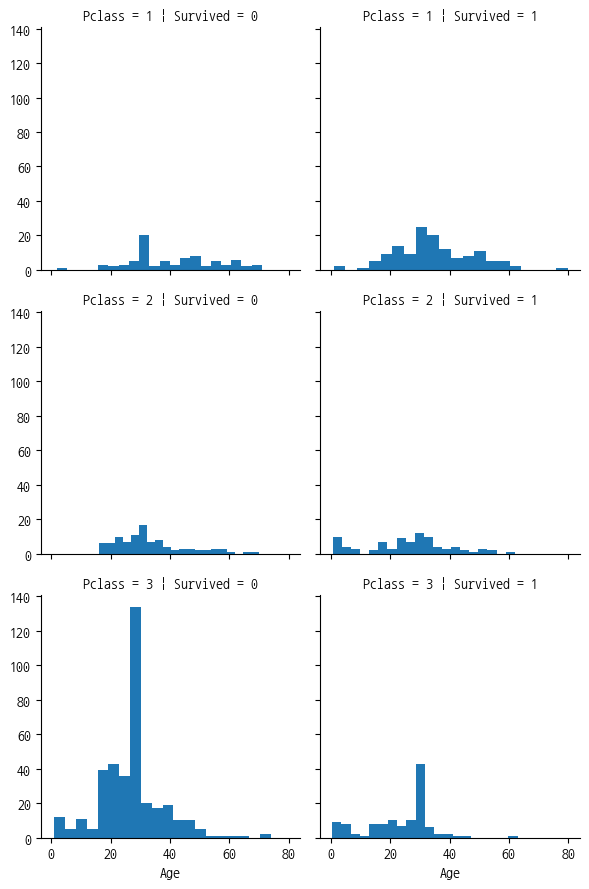

In [114]:
df_Pclass_Age = sns.FacetGrid(df, col = 'Survived', row = 'Pclass')
df_Pclass_Age.map_dataframe(plt.hist, 'Age', bins = 20)
plt.show()

# 생존에 영향을 미치는 잠재 인자 도출

생존률에 영향을 미치는 영향인자 도출을 위해 다음과 같이 가설을 세우고, 위 결과를 토대로 정리해보자.

>가설 1 : 선실등급은 생존에 영향을 주는 설명변수일 것이다.

견해 : 선실등급이 높을 수록 생존률이 높았기에, 선실등급은 생존에 영향을 주는 변수이다.</br>
또한, 사고가 나면 1, 2, 3등급 모두 탈출하려고 할텐데 1등급에 타있는 사람의 생존률이 높은 것으로봐서 탈출하기 좋은 위치에 있었을 거라 예상된다. 

>가설 2 : 성별은 생존에 영향을 주는 설명변수일 것이다.

견해 : 1912년에는 'Lady First'라는 개념이 존재했고, 결과 또한 남성보다 여성의 생존률이 높다는 사실을 확인할 수 있었다. </br>
그렇기에 성별은 생존에 영향을 주는 변수라 생각한다.

> 가설 3 : 나이는 생존에 영향을 주는 설명변수일 것이다.

견해 : 1등급보다 상대적으로 생존률이 낮은 2등급, 3등급에서는 어린아이의 생존확률이 높았다.</br> 시대적 관점으로 보아, 여성과 어린아이 먼저 구출했을 거라 예상된다.

> 가설 4 : 승선장소는 생존에 영향을 주는 설명변수일 것이다.

견해 : 승선장소는 C(Cherbourg)에서 탑승한 사람이 가장 생존률이 높았다. </br>
보다 구체적인 데이터를 얻기 위해 C(Cherbourg)에서 탑승한 사람이 어떤 객실등급에 많이 탔는지 분석해보려 한다.

<Axes: xlabel='Embarked', ylabel='Pclass'>

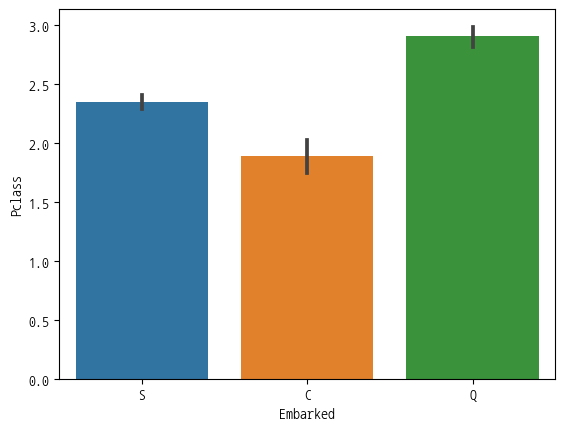

In [170]:
sns.barplot(x = 'Embarked', y = 'Pclass', data = df)

위 barplot 결괏값을 살펴보면 C(Cherbourg)에서 탑승한 사람들의 객실 등급이 1등급쪽에 더 가깝다.
위 결과를 토대로 간단한 도메인 지식을 검색해보니 Cherbourg는 프랑스의 항구도시, Queenstown은 뉴질랜드의 도시 중 하나, Southampton은 영국의 항구도시로 나타났다.
하지만 해당 자료만으로는 장소에 따른 생존율 차이가 나타났는지는 단정짓기는 어려울 거같다.
대신 1990년대 국가별 GDP를 확인해보니, 뉴질랜드 순위가 낮은걸로 봐서 뉴질랜드에서 3등급 객실에 많이 탑승했을 거란 생각이 든다.

>가설 5 : 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.

티켓 가격은 결국 객실 등급과 밀접한 관련이 있다 판단하여, 티켓 가격도 생존에 영향을 주는 변수일 것이다.

> 가설 6 : 함께 탑승수(형제, 배우자 또는 자녀, 부모)는 생존에 영향을 주는 설명변수일 것이다.

함께 탑승한 사람이 많아질수록 생존확률이 급격하게 떨어지는 것을 확인했다.</br>
하지만 함께 탑승한 사람이 1명 또는 2명일 경우에는 생존률이 높았다. </br>
하지만 하나의 특성과 생존 비율 만을 생각해서 예측하기에는 무리가 있다고 생각이 든다.

예를 들어 1등급 객실 티켓을 산 부유한 사람이 가족들이랑 왔을 경우가 많다고 가정해본다면, </br> 가족들과 함께 왔다고 해서 1등급 객실 티켓을 살 가능성이 높다고 할 수는 없으므로 </br>단일 특성을 가지고 생존 확률을 예측하기보단 여러가지 특성을 종합해서 예측하는 편이 좋다고 생각한다.

# 종합적으로 생존에 영향을 미치는 잠재 인자는 크게 다음과 같다

1. Pclass 승객 등급 
2. Sex 성별
3. Age 나이
4. Embarked 승객이 탑승한 곳